## Convolutional Neural Networks 

In [56]:
#pip install tensorflow

In [58]:
#pip install keras

In [5]:
import numpy as np
import pandas as pd

In [60]:
#pip install keras.models

In [61]:
from keras.utils import to_categorical

In [62]:
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [6]:
df=pd.read_csv('modified_data/combined_csv.csv')

df.head()

,Unnamed: 0,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,226,AGENCY,AGENCY FB,57,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
1,227,AGENCY,AGENCY FB,56,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
2,228,AGENCY,AGENCY FB,55,0.4,0,0.0,35,22,51,...,27,1,1,1,1,1,1,1,1,1
3,229,AGENCY,AGENCY FB,54,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
4,230,AGENCY,AGENCY FB,53,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60


In [7]:
df=df.drop(columns=['Unnamed: 0','font', 'fontVariant','strength','italic','orientation','m_top','m_left','originalH','originalW','h','w'])

In [9]:
#df=df.drop(columns=['originalW','h','w'])

In [10]:
df.m_label.unique()

array([57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 46, 44])

In [11]:
df.head()

,m_label,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,57,60,165,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,165,60
1,56,60,165,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,165,60
2,55,255,255,255,255,255,255,255,255,255,...,27,1,1,1,1,1,1,1,1,1
3,54,60,165,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,165,60
4,53,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,165,60


In [12]:
df.to_csv( "FINAL.csv", index=False, encoding='utf-8-sig')

In [13]:
DF_FINAL=pd.read_csv('FINAL.csv')

In [ ]:
#hacer diccionario 
#pasar diccionario a columna Y (m:label)
#hacer to_category

In [31]:
di={48:0, 49:1, 50:2,51:3,52:4,53:5,54:6,55:7,56:8,57:9,44:10,46:11}
#10 es coma, 11 es punto

In [ ]:
df['col1'].replace(di, inplace=True)

In [35]:
DF_FINAL= DF_FINAL.replace({"m_label": di})

In [36]:
DF_FINAL.m_label.unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 11, 10])

In [37]:
import random

filename = "FINAL.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//50  # sample size of %
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 

In [ ]:
#dataframe.info

In [38]:
dataframe = pd.read_csv(filename, skiprows=skip)

In [39]:
dataframe.head()

,m_label,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,51,79,202,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,202,79
1,54,1,1,1,1,1,1,1,1,255,...,255,255,255,255,1,1,1,1,1,1
2,54,1,16,19,25,41,65,81,127,163,...,206,206,203,157,111,74,49,35,27,17
3,57,1,1,1,1,1,1,1,1,1,...,255,255,255,255,1,1,1,1,1,1
4,48,9,10,14,39,82,114,141,167,177,...,166,165,153,121,82,36,16,5,2,1


In [40]:
dataframe= dataframe.replace({"m_label": di})

In [41]:
dataframe.m_label.unique()

array([ 3,  6,  9,  0,  5,  1,  2, 10,  8,  7,  4, 11])

In [42]:
dataframe.shape

(4474, 401)

In [ ]:
#fonts=dataframe.drop(columns=['Unnamed: 0'])

In [ ]:
#fonts.info

In [43]:
import matplotlib.pyplot as plt

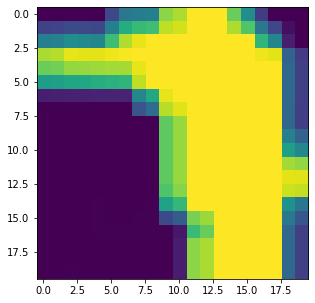

In [44]:
plt.figure(figsize=(5,5))
plt.imshow(dataframe.values[45,1:].reshape(20,20))
plt.show();

In [45]:
dataframe.m_label.unique()

array([ 3,  6,  9,  0,  5,  1,  2, 10,  8,  7,  4, 11])

In [46]:
input_shape=(20, 20, 1)

In [47]:
X=np.array(dataframe.iloc[:, 1:])

In [48]:
X.shape

(4474, 400)

In [ ]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
a = tf.constant(a, shape=[4, 4])
print(a)

In [49]:
primer_paso_y=np.array(dataframe.iloc[:,0])

In [50]:
len(primer_paso_y)

4474

In [51]:
primer_paso_y

array([3, 6, 6, ..., 6, 1, 3])

In [65]:
y=to_categorical(primer_paso_y)

In [66]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
y.shape

(4474, 12)

In [68]:
from sklearn.model_selection import train_test_split as tts

In [69]:
X_train, X_test, y_train, y_test=tts(X, y)

In [70]:
X_train=X_train.reshape(X_train.shape[0], 20, 20, 1).astype('float32')/255

X_test=X_test.reshape(X_test.shape[0], 20, 20, 1).astype('float32')/255

In [78]:
batch=256
n_clases=12 #we have 12 classes as defined in the dictionary numbers, point and comma
epocas=200

In [84]:
%%time
y.shape


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.6 µs


(4474, 12)

In [80]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Model

In [74]:
from tensorflow.keras import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [75]:
from tensorflow import keras

In [81]:
modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_initializer='he_normal', input_shape=input_shape))

modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(Dropout(0.4))

modelo.add(Flatten())
modelo.add(Dense(128,  activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


modelo.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adam(), 
               metrics=['accuracy'])

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)        

In [83]:
import time

In [85]:
%%time
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

CPU times: user 11min 47s, sys: 1min 59s, total: 13min 47s
Wall time: 4min 2s


In [86]:
score=modelo.evaluate(X_test, y_test, verbose=0)

In [87]:
print ('Perdida testeo: ', score[0])
print ('Accuracy testeo: ', score[1])

Perdida testeo:  0.12428642064332962
Accuracy testeo:  0.9615728259086609


In [88]:
acc=historico.history['accuracy']
loss=historico.history['loss']

epocas=range(len(acc))